In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading DataSets and Preprocessing

In [4]:
Cab_Data_df = pd.read_csv("Cab_Data.csv",delimiter=",")
print(Cab_Data_df.shape)
print(Cab_Data_df.info())
Cab_Data_df.head()

(359392, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
2016-(42371//365) ## 42371//365 gives us years from a base date

1900

Date of Travel column in Cab_Data_df represents ordinal values of days. So we need to convert it into usable date format by using "DateOffset" function.
Time period of data is from 31/01/2016 to 31/12/2018(1066 days) but we have 1095 unique values in Date of Travel column. So we need to set base date as '1899-12-29' and time period of data would be 01/01/2016 to 30/12/2018

In [6]:
dateTravel = Cab_Data_df['Date of Travel'].to_list()
ourBaseDate = pd.Timestamp('1899-12-29')
dates = [ourBaseDate + pd.DateOffset(date_offset) for date_offset in dateTravel]
Cab_Data_df['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [7]:
Cab_Data_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [8]:
Cab_Data_df['Date of Travel'].min()

Timestamp('2016-01-01 00:00:00')

In [9]:
Cab_Data_df['Date of Travel'].max()

Timestamp('2018-12-30 00:00:00')

In [10]:
Cust_ID_df = pd.read_csv("Customer_ID.csv",delimiter=",")
print(Cust_ID_df.shape)
print(Cust_ID_df.info())
Cust_ID_df.head()

(49171, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [11]:
Trans_ID_df = pd.read_csv("Transaction_ID.csv",delimiter=",")
print(Trans_ID_df.shape)
print(Trans_ID_df.info())
Trans_ID_df.head()

(440098, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [12]:
City_df = pd.read_csv("City.csv",delimiter=",")
print(City_df.shape)
print(City_df.info())
City_df.head()

(20, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [13]:
#Changing population and users count type as int instead of object

City_df['Population'] = City_df['Population'].str.replace(',', '').str.strip().astype(np.int64)
City_df['Users'] = City_df['Users'].str.replace(',', '').str.strip().astype(np.int64)

City_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [14]:
City_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


### Merging individual dataframes to create one master dataframe using common columns

In [15]:
master_df=pd.merge(Cab_Data_df, Trans_ID_df, on = "Transaction ID", how = "inner")

In [16]:
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [17]:
master_df=pd.merge(master_df, Cust_ID_df, on = "Customer ID", how = "inner")
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [18]:
master_df=pd.merge(master_df, City_df, on = "City", how = "inner")
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [19]:
master_df["Profit per trip"] = master_df["Price Charged"] - master_df["Cost of Trip"]
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit per trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808


In [20]:
master_df.shape

(359392, 15)

In [21]:
master_df = master_df.drop_duplicates()
master_df = master_df.dropna()

In [22]:
master_df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Profit per trip       0
dtype: int64

### Checking for outliers using boxplot

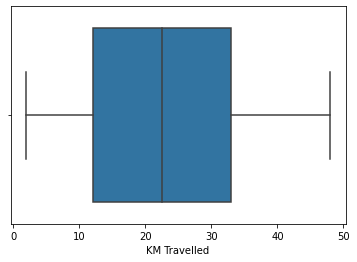

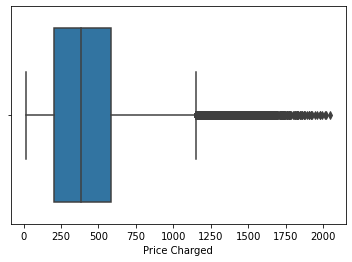

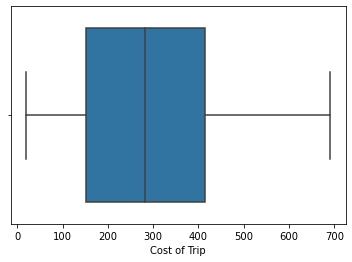

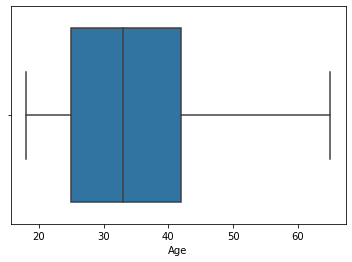

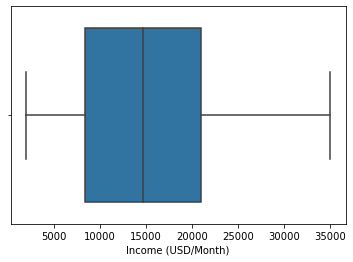

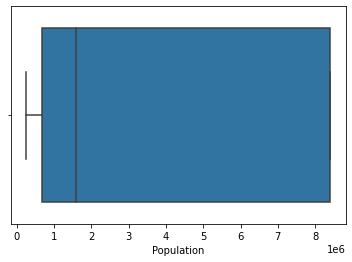

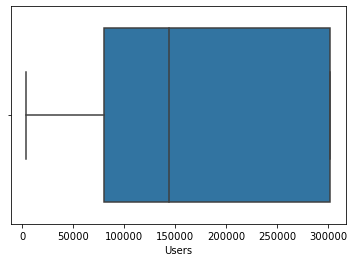

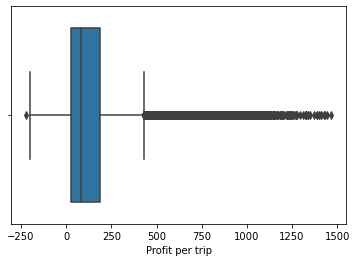

In [23]:
boxplot_columns=['KM Travelled','Price Charged','Cost of Trip','Age','Income (USD/Month)','Population','Users','Profit per trip']
for column in boxplot_columns:
    sns.boxplot(data=master_df, x = column)
    plt.show()

Only Outliers we could see is for "price Charged" column and "Profit per trip". As these values depend on various factors, I dont find the need to remove this outliers. So not taking any action on outliers.

In [24]:
any(master_df['Price Charged']< master_df['Cost of Trip'])

True

This explains negative values of profit per trip

In [25]:
master_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Profit per trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,1463.966000


## EDA

<AxesSubplot:>

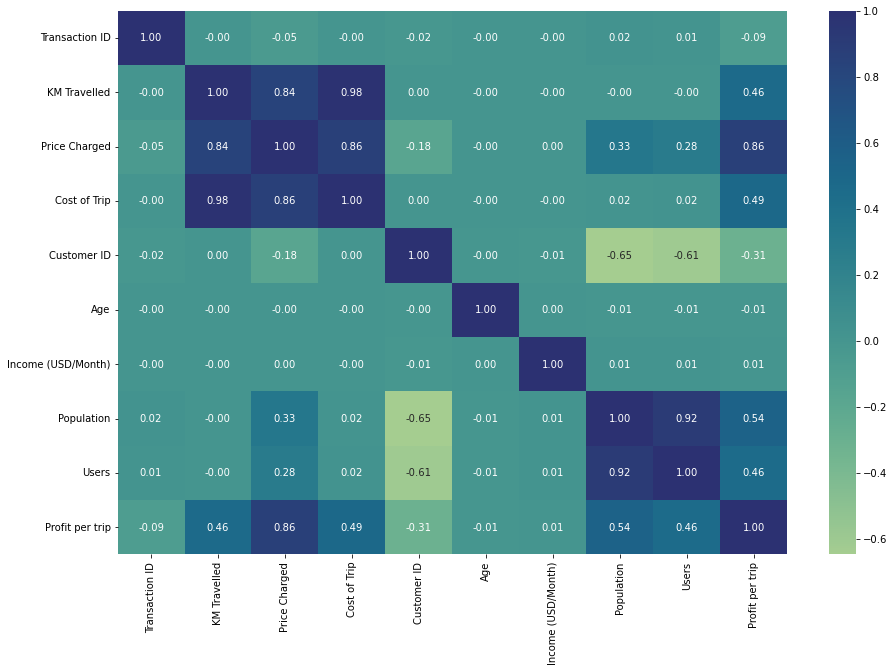

In [33]:
correlation = master_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, cmap="crest", annot=True,fmt=".2f")

Observations:
Strong correlations observed between below below features
1)Cost of trip and KM travelled
2)Population and Users
3)Price Charged and Profit per trip
4)Price Charged and Cost of trip


In [34]:
## separating numerical and categorical features
df_numerical_features = master_df.select_dtypes(include='number')
df_categorical_features = master_df.select_dtypes(exclude='number')

### Cab Count by Company

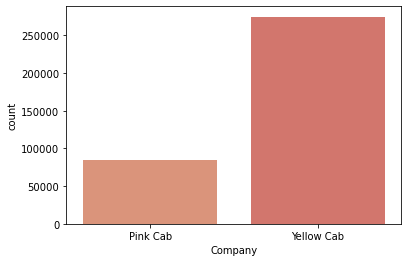

In [58]:
company_palette = sns.color_palette("flare")
sns.countplot(data=master_df, x="Company", palette=company_palette)
plt.show()

Yellow Cab has highest count compared to Pink Cab

## Profit earned by company

<AxesSubplot:xlabel='Company', ylabel='Profit per trip'>

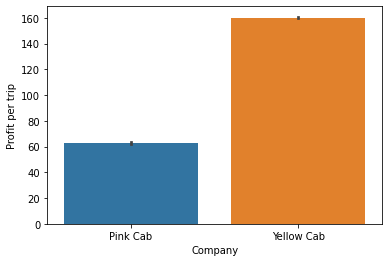

In [57]:
sns.barplot(data=master_df, x="Company", y="Profit per trip")

Average profit per trip is highest for Yellow Cab compared to Pink Cab

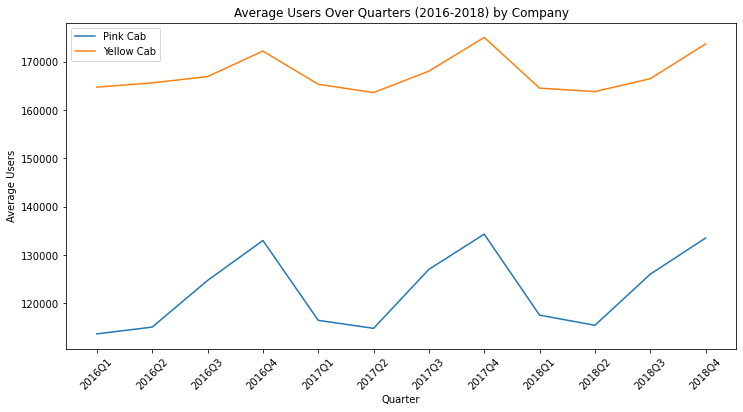

In [74]:

master_df["Quarter"] = master_df["Date of Travel"].dt.to_period("Q")

# Convert the "Quarter" column to a string to avoid data type issues
master_df["Quarter"] = master_df["Quarter"].astype(str)

# Convert the "Users" column to a numeric type (if not already)
master_df["Users"] = pd.to_numeric(master_df["Users"])

# Group the data by "Company" and "Quarter" and calculate the mean "Users" for each group
quarterly_data = master_df.groupby(["Company", "Quarter"])["Users"].mean().reset_index()

# line plot for each company
plt.figure(figsize=(12, 6))
for company in quarterly_data["Company"].unique():
    company_data = quarterly_data[quarterly_data["Company"] == company]
    sns.lineplot(data=company_data, x="Quarter", y="Users", label=company)

plt.xlabel("Quarter")
plt.ylabel("Average Users")
plt.title("Average Users Over Quarters (2016-2018) by Company")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Show the plot
plt.show()



#### Observations:
1) Average users over the years is highest for Yellow cab     
2) Seasonal pattern is observed for both companies     
    * Average users count increase from Q2 to Q4 and peak is observed at Q4   
    * Average users count decrease from Q4 to Q1 and stay stable from Q1 to Q2    

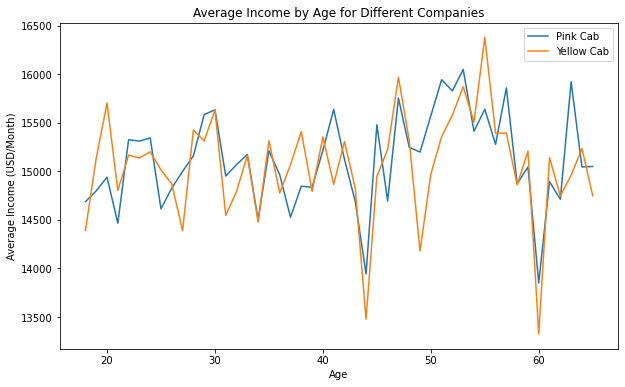

In [76]:
# Get the unique company names in the 'Company' column
unique_companies = master_df['Company'].unique()

# Create a dictionary to store the results for each company
average_income_by_age = {}

# Iterate through each unique company and calculate average income by age
for company in unique_companies:
    # Filter the dataset for the specific company
    company_data = master_df[master_df['Company'] == company]

    # Group the data by 'Age' and calculate the average income for each age group
    average_income_by_age[company] = company_data.groupby('Age')['Income (USD/Month)'].mean()

# Convert the dictionary to a DataFrame for easier analysis
result_df = pd.DataFrame(average_income_by_age)

# Reset the index to make 'Age' a regular column
result_df = result_df.reset_index()

# Create a line plot for average income by age for each company
plt.figure(figsize=(10, 6))
for company in unique_companies:
    sns.lineplot(data=result_df, x='Age', y=company, label=company)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Average Income (USD/Month)')
plt.title('Average Income by Age for Different Companies')

# Show the legend
plt.legend()

# Show the plot
plt.show()


<AxesSubplot:title={'center':'Money earned by payment method'}, xlabel='Payment_Mode', ylabel='Price Charged'>

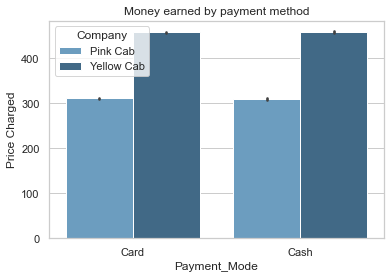

In [79]:
#money earned by payment method.
plt.title("Money earned by payment method")
sns.set_theme(style="whitegrid")
sns.barplot(data=master_df,hue="Company",x="Payment_Mode",y="Price Charged",palette="Blues_d")

<AxesSubplot:xlabel='KM Travelled', ylabel='Count'>

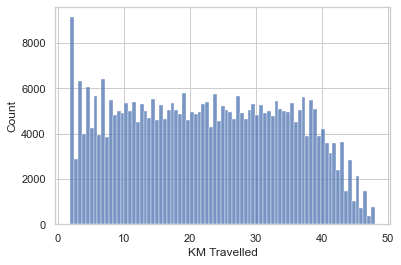

In [85]:
sns.histplot(data=master_df, x="KM Travelled")

<AxesSubplot:xlabel='Price Charged', ylabel='Count'>

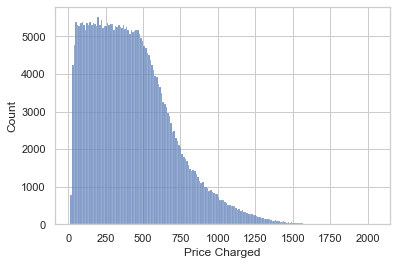

In [84]:
sns.histplot(data=master_df, x="Price Charged")

<AxesSubplot:title={'center':'Total Customer by city'}, xlabel='City', ylabel='count'>

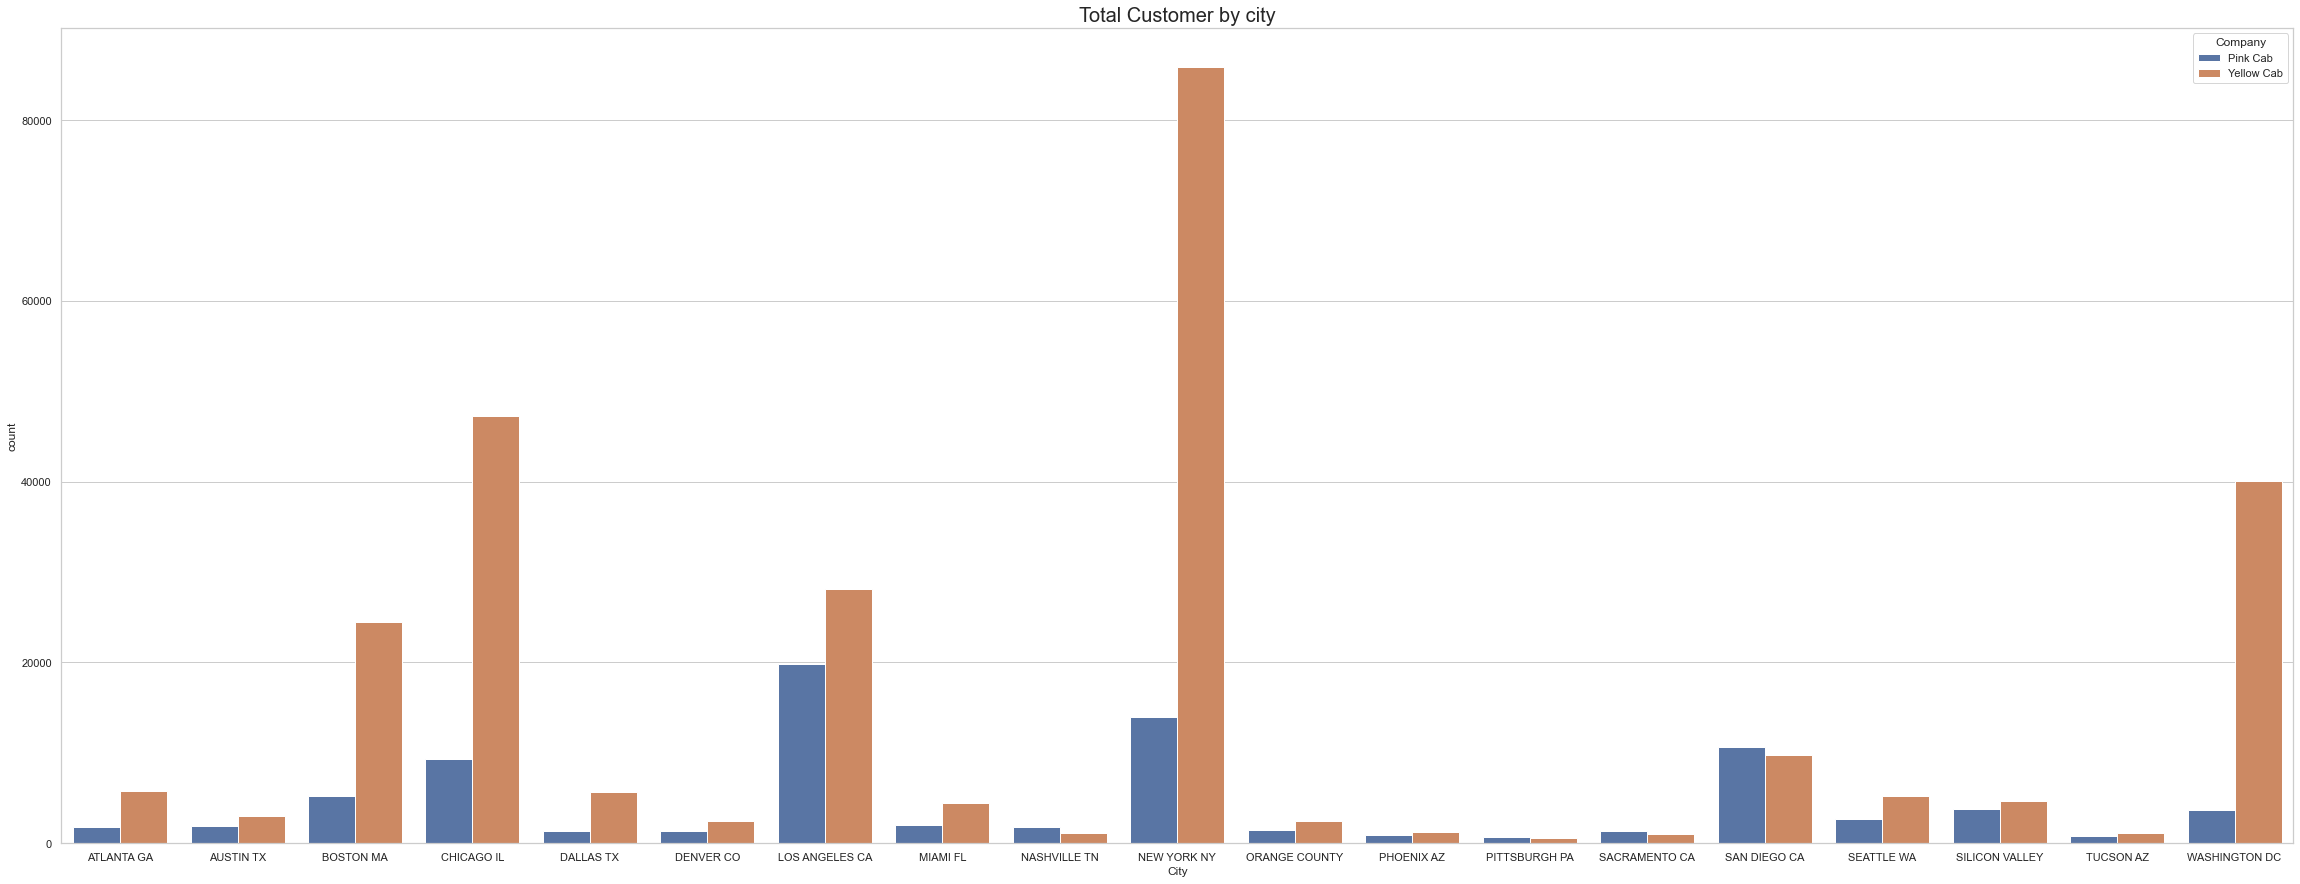

In [92]:
plt.figure(figsize=(40,15))
plt.title("Total Customer by city",fontsize=20)
sns.countplot(data=master_df,hue="Company",x="City")

In [114]:
City_df["User_Pop_ratio"] = City_df["Users"] / City_df["Population"]
City_df

,City,Population,Users,User_Pop_ratio
0,NEW YORK NY,8405837,302149,0.035945
1,CHICAGO IL,1955130,164468,0.084121
2,LOS ANGELES CA,1595037,144132,0.090363
3,MIAMI FL,1339155,17675,0.013199
4,SILICON VALLEY,1177609,27247,0.023138
5,ORANGE COUNTY,1030185,12994,0.012613
6,SAN DIEGO CA,959307,69995,0.072964
7,PHOENIX AZ,943999,6133,0.006497
8,DALLAS TX,942908,22157,0.023499
9,ATLANTA GA,814885,24701,0.030312


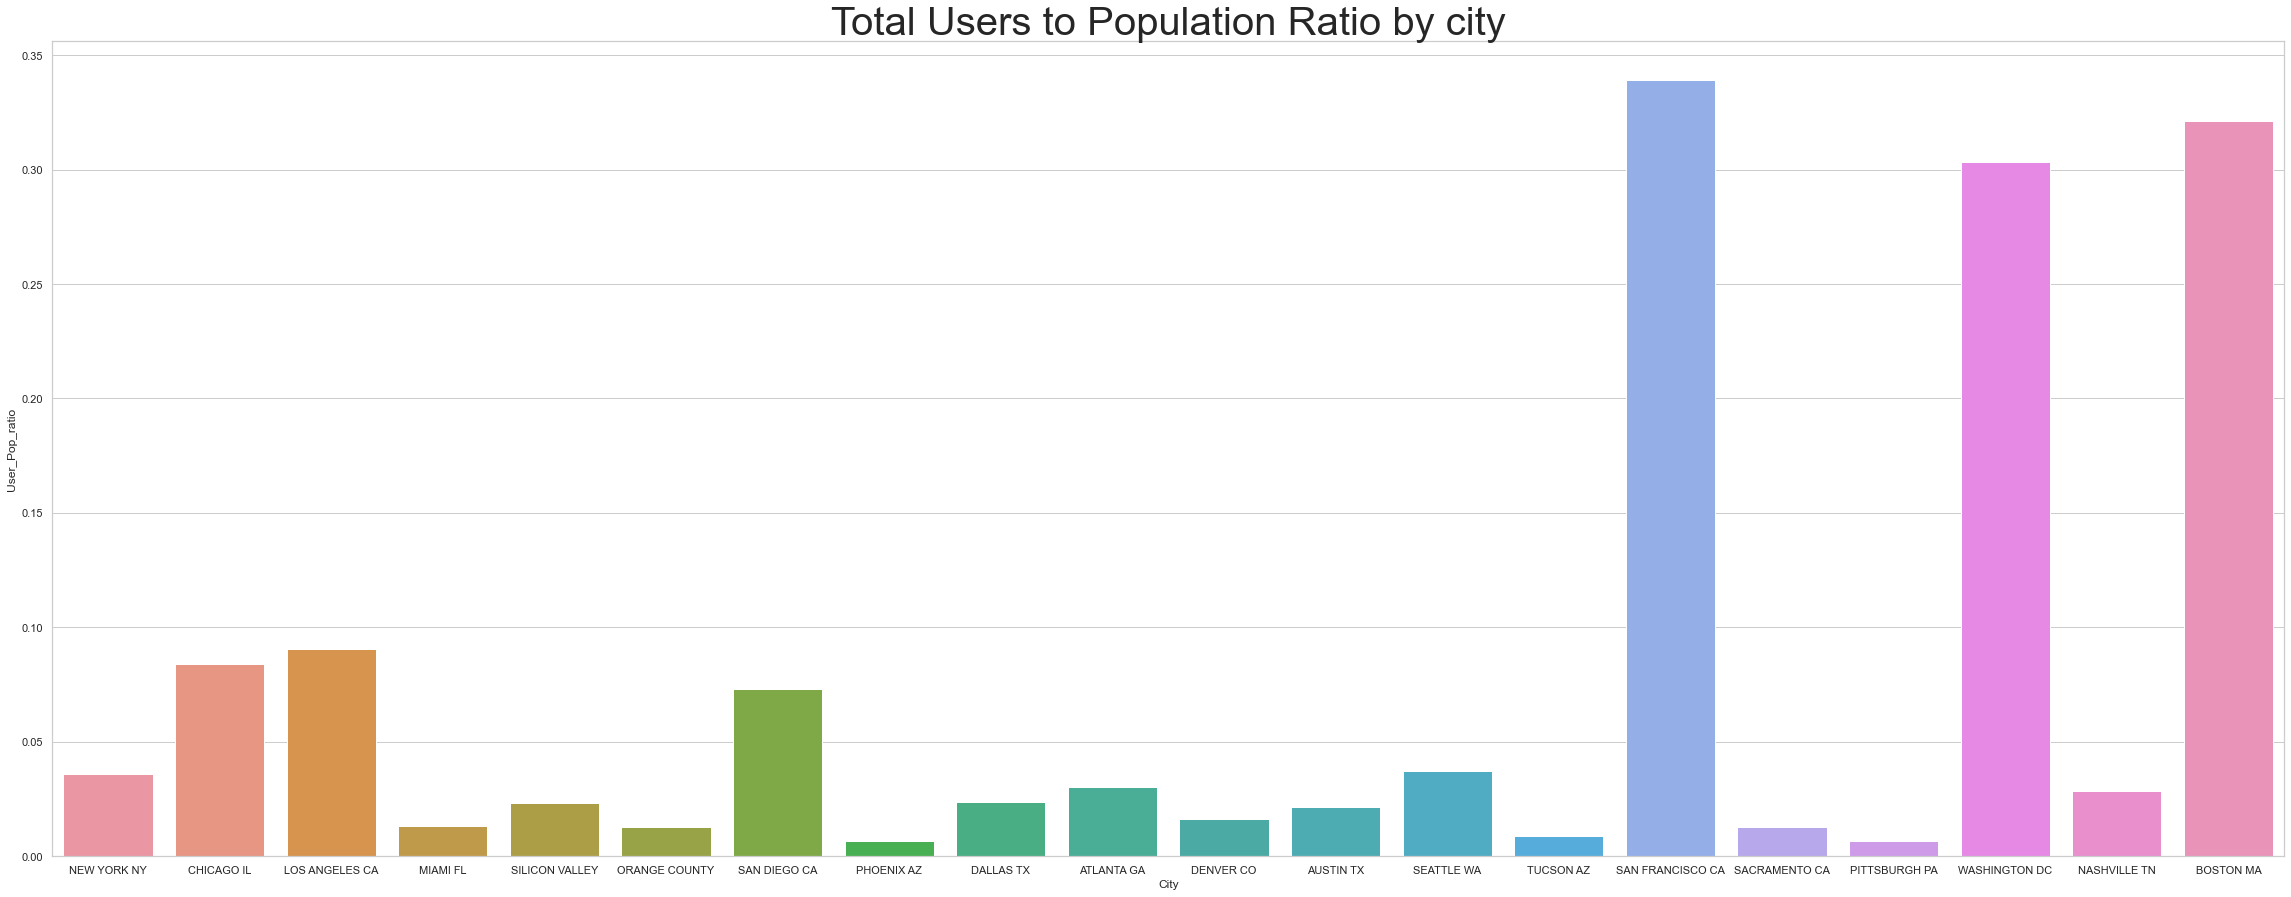

In [115]:
plt.figure(figsize=(40,15))
plt.title("Total Users to Population Ratio by city",fontsize=40)
sns.barplot(data=City_df,x="City",y="User_Pop_ratio")
plt.show()

Observations:
San Francisco CA, Washington Dc, Boston MA has highest user to population ratio. 

In [137]:
profit_by_city = master_df.groupby(["City","Company"])["Profit per trip"].sum().unstack()
profit_by_city

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,96050.076,7.463828e+05
AUSTIN TX,147445.290,3.792557e+05
BOSTON MA,262001.698,1.506718e+06
CHICAGO IL,318722.488,3.068591e+06
DALLAS TX,24730.112,1.104003e+06
DENVER CO,40584.939,3.570001e+05
LOS ANGELES CA,1125732.065,3.285977e+06
MIAMI FL,162301.191,5.960001e+05
NASHVILLE TN,64284.534,8.524768e+04


In [144]:
City_df=pd.merge(City_df, profit_by_city, on = "City", how = "inner")
City_df["Pink Cab_profit"] = City_df["Pink Cab"]
City_df["Yellow Cab_profit"] = City_df["Yellow Cab"]
City_df=City_df.drop(["Pink Cab","Yellow Cab"],axis=1)
City_df

,City,Population,Users,User_Pop_ratio,Pink Cab_profit,Yellow Cab_profit
0,NEW YORK NY,8405837,302149,0.035945,1511474.388,2.645108e+07
1,CHICAGO IL,1955130,164468,0.084121,318722.488,3.068591e+06
2,LOS ANGELES CA,1595037,144132,0.090363,1125732.065,3.285977e+06
3,MIAMI FL,1339155,17675,0.013199,162301.191,5.960001e+05
4,SILICON VALLEY,1177609,27247,0.023138,340250.531,9.764547e+05
5,ORANGE COUNTY,1030185,12994,0.012613,101995.833,3.550060e+05
6,SAN DIEGO CA,959307,69995,0.072964,637889.769,9.492737e+05
7,PHOENIX AZ,943999,6133,0.006497,35596.394,1.573445e+05
8,DALLAS TX,942908,22157,0.023499,24730.112,1.104003e+06
9,ATLANTA GA,814885,24701,0.030312,96050.076,7.463828e+05


<AxesSubplot:xlabel='City'>

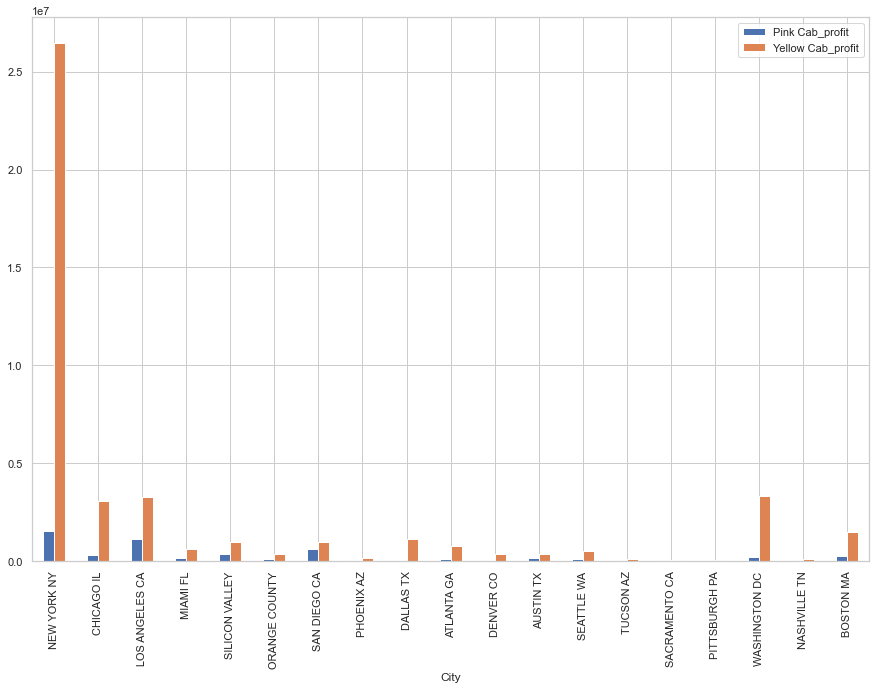

In [153]:
City_df.plot(x="City",y=["Pink Cab_profit","Yellow Cab_profit"], kind = "bar", figsize=(15,10))

In [157]:
any(City_df["Pink Cab_profit"] > City_df["Yellow Cab_profit"])

False

Yellow Cab has highest profit compared to Pink Cab in all the cities

In [156]:
Avg_Usr_Income_Company = master_df.groupby("Company")["Income (USD/Month)"].mean()
Avg_Usr_Income_Company

Company
Pink Cab      15059.047137
Yellow Cab    15045.669817
Name: Income (USD/Month), dtype: float64

Average Income of users is almost same for both companies.

# EDA recommendation and hypothesis results 

1) Yellow Cab has highest transactions compared to Pink Cab.    
2) Huge difference in Average profit per trip is observed between both companies. Yellow Cab has highest average profit of 160 dollars per trip and Pink Cab has average profit per trip is 60 dollars.    
3) Average users over the years is highest for Yellow cab. Seasonal pattern is observed for both companies. Average users count increase from Q2 to Q4 and peak is observed at Q4. Average users count decrease from Q4 to Q1 and stay stable from Q1 to Q2.  
4) Money earned by card and cash are almost same for both companies.       
5) Price charged distribution is right skewed justifying the decrease in count for high price charges.   
6) Total Customers are higher for Yellow Cab in 16 cities and higher for Pink Cab in only 3 cities.   
7) San Francisco CA, Washington Dc, Boston MA has highest user to population ratio.    
8) Yellow Cab has highest profit compared to Pink Cab in all the cities.   
9) Average Income of users is almost same for both companies.   

## By Considering all the above facts, I would suggest company XYZ to invest in Yellow Cab company.